# Week 8 Intermediate Pandas

We will build on our last lesson where we introduced pandas. We will learn how to merge dataframes together and aggregate our data. Then we will look at the matplotlib package and visualize our data.

In [1]:
import pandas as pd

aisles = pd.read_csv('data//aisles.csv')

departments = pd.read_csv('data//departments.csv')

products = pd.read_csv('data//products.csv')

orders_basket = pd.read_csv('data//order_products__train.csv')

orders = pd.read_csv('data//orders.csv')

In [2]:
#aisle desc

aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
#department desc

departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
#product desc, what aisle and what department it belongs to

products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
#a view of what items were purchased in an order (only a sample of all the orders)

orders_basket.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
#detail on when an order was placed, by whom, and a handful of other facts

orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## Joining Datasets

If we want to make inferences about which departments have the most orders or if we want to know how many unique items are in the specialty cheeses aisle, we need to join some of these datasets together.

In [7]:
#left join

products.merge(departments, on = 'department_id', how = 'left')

#inner join

products.merge(departments, on = 'department_id')

#right join

products.merge(departments, on = 'department_id', how = 'right')

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,16,Mint Chocolate Flavored Syrup,103,19,snacks
2,25,Salted Caramel Lean Protein & Fiber Bar,3,19,snacks
3,32,Nacho Cheese White Bean Chips,107,19,snacks
4,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,snacks
5,56,Healthy Pop Butter Popcorn,23,19,snacks
6,59,Medium Taqueria Style Chipotle Salsa,50,19,snacks
7,77,Coconut Chocolate Chip Energy Bar,3,19,snacks
8,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks
9,93,Uncured Cracked Pepper Beef,23,19,snacks


In [8]:
len(orders_basket['order_id'].unique())

131209

In [9]:
len(orders['order_id'].unique())

3421083

In [10]:
#if we do a left join we will only match records where we have an entry in the orders_basket table

len(orders_basket.merge(orders, on = 'order_id', how = 'left')['order_id'].unique())

131209

In [11]:
#if we do a right join we will match all the records in the orders table

len(orders_basket.merge(orders, on = 'order_id', how = 'right')['order_id'].unique())

3421083

In [12]:
orders_basket.merge(orders, on = 'order_id', how = 'right')

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302.0,1.0,1.0,112108,train,4,4,10,9.0
1,1,11109.0,2.0,1.0,112108,train,4,4,10,9.0
2,1,10246.0,3.0,0.0,112108,train,4,4,10,9.0
3,1,49683.0,4.0,0.0,112108,train,4,4,10,9.0
4,1,43633.0,5.0,1.0,112108,train,4,4,10,9.0
5,1,13176.0,6.0,0.0,112108,train,4,4,10,9.0
6,1,47209.0,7.0,0.0,112108,train,4,4,10,9.0
7,1,22035.0,8.0,1.0,112108,train,4,4,10,9.0
8,36,39612.0,1.0,0.0,79431,train,23,6,18,30.0
9,36,19660.0,2.0,1.0,79431,train,23,6,18,30.0


## Aggregating Data

Now that we have joined some datasets together, we can aggregate them to understand our dataset better.

In [16]:
orders_basket

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [17]:
prod_dept = products.merge(departments, on = 'department_id').drop('department_id', axis = 1)

prod_dept_ais = prod_dept.merge(aisles, on = 'aisle_id').drop('aisle_id', axis = 1)

prod_orders = prod_dept_ais.merge(orders_basket, on = 'product_id')

prod_orders

,product_id,product_name,department,aisle,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,snacks,cookies cakes,6695,7,1
1,1,Chocolate Sandwich Cookies,snacks,cookies cakes,48361,9,0
2,1,Chocolate Sandwich Cookies,snacks,cookies cakes,63770,4,0
3,1,Chocolate Sandwich Cookies,snacks,cookies cakes,75339,9,0
4,1,Chocolate Sandwich Cookies,snacks,cookies cakes,240996,3,1
5,1,Chocolate Sandwich Cookies,snacks,cookies cakes,253400,4,1
6,1,Chocolate Sandwich Cookies,snacks,cookies cakes,255938,4,0
7,1,Chocolate Sandwich Cookies,snacks,cookies cakes,273262,1,1
8,1,Chocolate Sandwich Cookies,snacks,cookies cakes,298510,1,1
9,1,Chocolate Sandwich Cookies,snacks,cookies cakes,304053,3,1


In [14]:
#the groupby method will help us aggregate data by a categorical variable

prd_grp = prod_dept_ais.groupby('aisle').count()

prd_grp

,product_id,product_name,department
aisle,,,
air fresheners candles,355,355,355
asian foods,605,605,605
baby accessories,44,44,44
baby bath body care,132,132,132
baby food formula,718,718,718
bakery desserts,297,297,297
baking ingredients,623,623,623
baking supplies decor,290,290,290
beauty,178,178,178


In [61]:
# the sort values method will help us reorder the data

prd_grp = prd_grp.sort_values('product_id', ascending = False)

prd_grp

,product_id,product_name,department
aisle,,,
missing,1258,1258,1258
candy chocolate,1246,1246,1246
ice cream ice,1091,1091,1091
vitamins supplements,1038,1038,1038
yogurt,1026,1026,1026
chips pretzels,989,989,989
tea,894,894,894
packaged cheese,891,891,891
frozen meals,880,880,880


In [62]:
#reset the index to unselect columns after a groupby operation

prd_grp.reset_index()

,aisle,product_id,product_name,department
0,missing,1258,1258,1258
1,candy chocolate,1246,1246,1246
2,ice cream ice,1091,1091,1091
3,vitamins supplements,1038,1038,1038
4,yogurt,1026,1026,1026
5,chips pretzels,989,989,989
6,tea,894,894,894
7,packaged cheese,891,891,891
8,frozen meals,880,880,880
9,cookies cakes,874,874,874


In [49]:
prod_dept_ais.groupby(['department','aisle']).count()

product_id  product_name
department    aisle                                                  
alcohol       beers coolers                         385           385
              red wines                             232           232
              specialty wines champagnes             95            95
              spirits                               195           195
              white wines                           147           147
babies        baby accessories                       44            44
              baby bath body care                   132           132
              baby food formula                     718           718
              diapers wipes                         187           187
bakery        bakery desserts                       297           297
              bread                                 557           557
              breakfast bakery                      226           226
              buns rolls                            195           195
              tortillas flat bread                  241           241
beverages     cocoa drink mixes                     223           223
              coffee                                680           680
              energy sports drinks                  294           294
              juice nectars                         792           792
              refrigerated                          675           675
              soft drinks                           463           463
              tea                                   894           894
              water seltzer sparkling water         344           344
breakfast     breakfast bars pastries               173           173
              cereal                                454           454
              granola                               185           185
              hot cereal pancake mixes              303           303
bulk          bulk dried fruits vegetables           12            12
              bulk grains rice dried goods           26            26
canned goods  canned fruit applesauce               243           243
              canned jarred vegetables              487           487
...                                                 ...           ...
personal care eye ear care                          113           113
              facial care                           277           277
              feminine care                         285           285
              first aid                             240           240
              hair care                             816           816
              muscles joints pain relief            172           172
              oral hygiene                          565           565
              protein meal replacements             325           325
              shave needs                           198           198
              skin care                             245           245
              soap                                  525           525
              vitamins supplements                 1038          1038
pets          cat food care                         499           499
              dog food care                         473           473
produce       fresh fruits                          382           382
              fresh herbs                            86            86
              fresh vegetables                      569           569
              packaged produce                       32            32
              packaged vegetables fruits            615           615
snacks        candy chocolate                      1246          1246
              chips pretzels                        989           989
              cookies cakes                         874           874
              crackers                              747           747
              energy granola bars                   832           832
              fruit vegetable snacks                356

In [21]:
#What are the most popular items (most ordered)

most_ordered = prod_orders.groupby('product_name').count().reset_index().loc[:,['product_name', 'add_to_cart_order']]

most_ordered = most_ordered.sort_values('add_to_cart_order', ascending = False)

most_ordered.head()

,product_name,add_to_cart_order
2814,Banana,18726
2641,Bag of Organic Bananas,15480
25128,Organic Strawberries,10894
22496,Organic Baby Spinach,9784
17475,Large Lemon,8135


In [23]:
#Which departments have the most loyal shoppers (highest percentage of being reordered)?

most_loyal = prod_orders.groupby('department').mean().reset_index().loc[:,['department', 'reordered']]

most_loyal = most_loyal.sort_values('reordered', ascending = False)

most_loyal.head()

,department,reordered
7,dairy eggs,0.674966
19,produce,0.664617
3,beverages,0.658155
2,bakery,0.634211
18,pets,0.630198


## Plotting with matplotlib

For pandas users, plotting is much simpler than using the dreaded matplotlib package. Matplotlib is notorious for being bulky / heavy and not having excellent documentation. Luckily, pandas uses matplotlib in the background and has a very simplified version that will allow you to create 95% of the charts you need for data analysis.

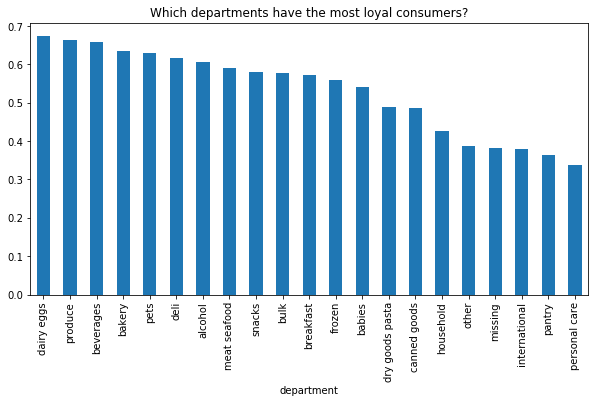

In [25]:
_ = most_loyal.plot(kind='bar',
                x='department',
                y='reordered',
                legend = False,
                figsize = (10,5),
                title='Which departments have the most loyal consumers?')

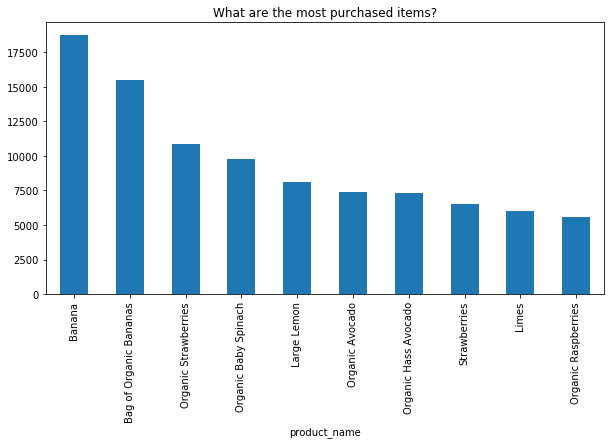

In [26]:
_ = most_ordered.head(10).plot(kind='bar',
                x='product_name',
                y='add_to_cart_order',
                legend = False,
                figsize = (10,5),
                title='What are the most purchased items?')

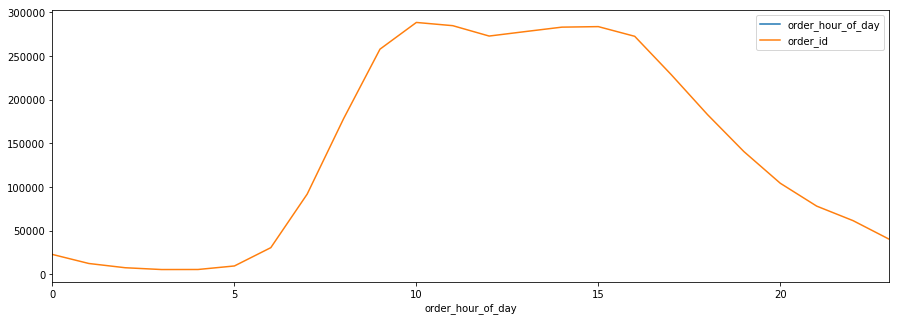

In [39]:
ord_hour = orders.groupby('order_hour_of_day').count().loc[:,['order_hour_of_day','order_id']]

_ = ord_hour.plot(kind = 'line',
             figsize = (15,5))